In [18]:
pip install --upgrade numpy scipy pandas pmdarima

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
data = pd.read_csv('data/Boston_Year.csv')

# Print the column names to check for 'temp' and 'datetime'
print("Column names:", data.columns)

# Print the first few rows to inspect the data
print(data.head())

# Preprocess Data
# Handle missing values by filling them with the mean of the column
if 'temp' in data.columns:
    data['temp'].fillna(data['temp'].mean(), inplace=True)
else:
    print("Error: 'temp' column not found in the data.")

# Convert the datetime column to datetime format
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)
else:
    print("Error: 'datetime' column not found in the data.")

# Check for stationarity using ADF test
result = adfuller(data['temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, data is not stationary, apply differencing
if result[1] > 0.05:
    data['temp_diff'] = data['temp'].diff().dropna()
else:
    data['temp_diff'] = data['temp']

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data['temp_diff'][:train_size], data['temp_diff'][train_size:]

# Fit SARIMAX Model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot Predictions vs Actual Data
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], test, label='Actual')
plt.plot(data.index[train_size:], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Prediction using SARIMAX')
plt.legend()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

C:\Users\dlree\OneDrive\Documents\Senior Design I\New Clone\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dlree\OneDrive\Documents\Senior Design I\New Clone\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


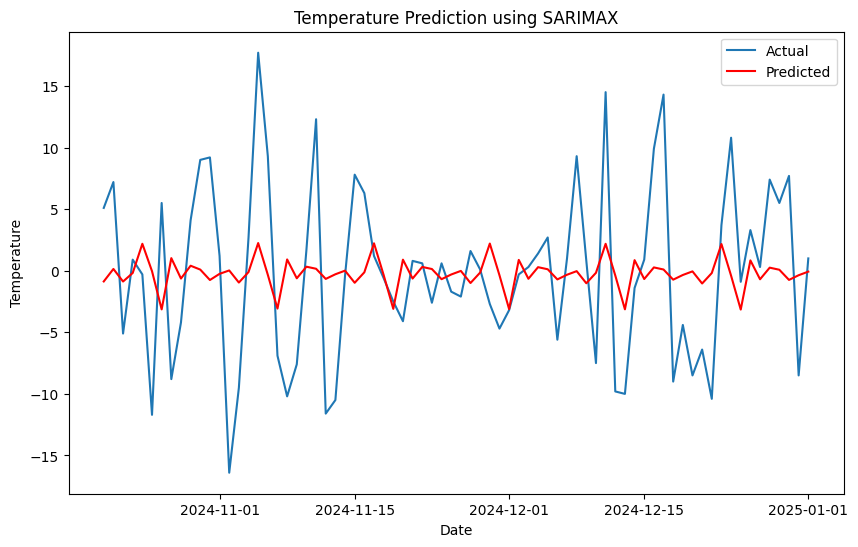

In [10]:
# Fit SARIMAX Model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot Predictions vs Actual Data
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size:], test, label='Actual')
plt.plot(data.index[train_size:], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Prediction using SARIMAX')
plt.legend()
plt.show()